# Spambase Project - Intro to ML Final

## Leon Huang and Leon Jiao

### Introduction
The following project will center around predicting whether an email is a spam email based off of characters, words, and phrases contained within the email. Throughout, we will be using machine learning techniques that we have learned during the INFO 1998 course. 

[Insert some shit]

#### Source

https://archive.ics.uci.edu/dataset/94/spambase

### Preliminary Steps: Data at a First Glance

First, we import the necessary packages.

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the Feature names

In [26]:
with open("spambase.names", "r") as namesFile:
    namesInfo = namesFile.readlines()

for index, line in enumerate(namesInfo):
    print(index, "\t", line)

0 	 | SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)

1 	 |

2 	 | 48 continuous real [0,100] attributes of type word_freq_WORD 

3 	 | = percentage of words in the e-mail that match WORD,

4 	 | i.e. 100 * (number of times the WORD appears in the e-mail) / 

5 	 | total number of words in e-mail.  A "word" in this case is any 

6 	 | string of alphanumeric characters bounded by non-alphanumeric 

7 	 | characters or end-of-string.

8 	 |

9 	 | 6 continuous real [0,100] attributes of type char_freq_CHAR

10 	 | = percentage of characters in the e-mail that match CHAR,

11 	 | i.e. 100 * (number of CHAR occurences) / total characters in e-mail

12 	 |

13 	 | 1 continuous real [1,...] attribute of type capital_run_length_average

14 	 | = average length of uninterrupted sequences of capital letters

15 	 |

16 	 | 1 continuous integer [1,...] attribute of type capital_run_length_longest

17 	 | = length of longest uninterrupted sequence of capital letters

18 	 |

19 	 | 1 continuo

By inspection, the feature names begin at index 33.

In [27]:
# This yields our 57 features of interest
featuresList = namesInfo[33:]
featureNames = [name[: name.index(":")] for name in featuresList]
featureNames.append("spam_class")
featureNames

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

### Load the data 

In [28]:
data = pd.read_csv("spambase.data", names=featureNames)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [29]:
# Get data statistics
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [30]:
data.shape

(4601, 58)

Here, we can see that there are 4601 data points for us to analyze. 

# Correlation Matrix Visualization

This matrix displays the value of the Pearson correlation coefficient between each of the features.

In [31]:
correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm')

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.21145

We look at the heatmap correlating features with spam classification. 

<Axes: >

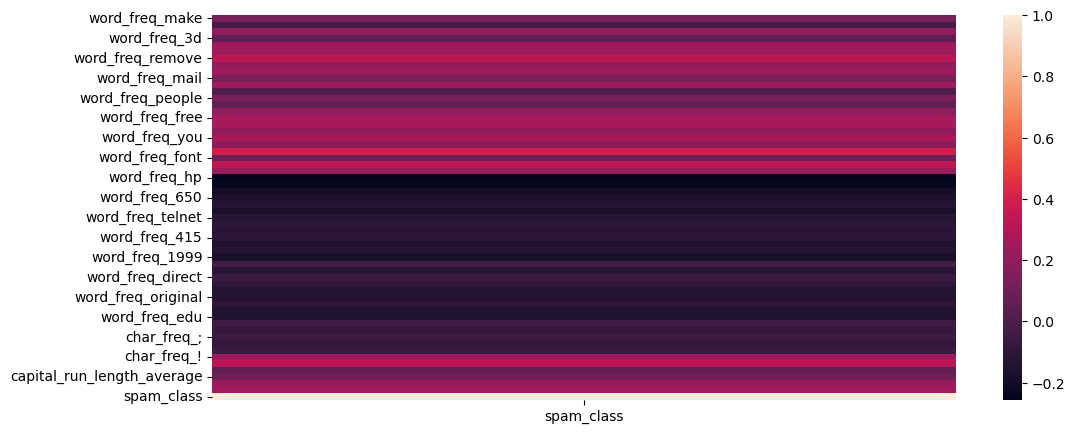

In [32]:
sns.heatmap(correlation[["spam_class"]])

Sort these features to identify those with the greatest correlation coefficients, taking the absolute value to disregard negatives. 

In [33]:
spam_corr = correlation["spam_class"].abs()
# spam_corr = sorted(spam_corr)
spam_corr = spam_corr.sort_values(ascending=False)[1:]
spam_corr

word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_hp                  0.256723
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_hpl                 0.232968
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_george              0.183404
word_freq_1999                0.178045
word_freq_labs                0.171095
word_freq_650            

#### We see that our top 5 features correlated with spam classification are the word frequencies of your, 000, remove, and you, and the character frequency of $.

#### The top 10 features correlated with spam classification are word frequencies of your, 000, remove, you, free, business, hp, and our; the character frequency of $; and the total length of sequences of capital letters.

In [34]:
features_5 = list(spam_corr[:5].keys())
features_10 = list(spam_corr[:10].keys())
X = data[features_5]
X2 = data[features_10]
Y = data["spam_class"]

# Machine Learning Models

With these five features, we are now ready to do machine learning!

We will look at five models: A Decision Tree Classifier, a Random Forest Classifier, a K-Neighbors Classifier, Logistic Regression, and Support Vector Machine.

#### Split the data using train_test_split.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# A dictionary to save the accuracies of different models for a later visualization
accuracies5 = {}

#### Decision Tree Classifier

We need to find the most optimal depth that maximizes the accuracy of the model. 

In [36]:
from sklearn.tree import DecisionTreeClassifier

best_depth = 1
best_accuracy = -1

for x in range(1, 50):
    model = DecisionTreeClassifier(max_depth = x)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    score = accuracy_score(prediction, y_test)
    
    if(score > best_accuracy):
        best_depth = x
        best_accuracy = score
        
accuracies5["Decision Tree"] = best_accuracy
print("The Decision Tree is most accurate when it has depth {depth}.".format(depth=best_depth))
print("The greatest accuracy of the Decision Tree is {acc}.".format(acc=best_accuracy))

The Decision Tree is most accurate when it has depth 6.
The greatest accuracy of the Decision Tree is 0.8534201954397395.


#### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rmodel = RandomForestClassifier()
rmodel.fit(x_train, y_train)
rpredictions = rmodel.predict(x_test)

accuracies5["Random Forest"] = accuracy_score(rpredictions, y_test)
print("Accuracy Score with a Random Forest Classifier:", accuracy_score(rpredictions, y_test))

Accuracy Score with a Random Forest Classifier: 0.8588490770901195


#### K-Neighbors Classifier

We find the optimal number of neighbors.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

best_k = 1
best_accuracy = -1

for x in range(1, 50):
    kmodel = KNeighborsClassifier(n_neighbors = x)
    kmodel.fit(x_train, y_train)
    prediction = kmodel.predict(x_test)
    score = accuracy_score(prediction, y_test)
    
    if(score > best_accuracy):
        best_k = x
        best_accuracy = score

accuracies5["K-Neighbors"] = best_accuracy
print("Accuracy Score with a K-Nearest Neighbors Classifier with {k} neighbors: {acc}".format(k=best_k, acc=best_accuracy))

Accuracy Score with a K-Nearest Neighbors Classifier with 14 neighbors: 0.8273615635179153


#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression()
lmodel.fit(x_train, y_train)
lpredictions = lmodel.predict(x_test)

accuracies5["Logistic Regression"] = accuracy_score(lpredictions, y_test)
print("Accuracy Score with a Logistic Regression:", accuracy_score(lpredictions, y_test))

Accuracy Score with a Logistic Regression: 0.8284473398479913


#### Support Vector Machine

In [40]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracies5["Support Vector Machine"] = accuracy_score(predictions, y_test)
print("Accuracy Score with SVM:", accuracy_score(predictions, y_test))

Accuracy Score with SVM: 0.8295331161780674


### We see that for 5 features, the Random Forest Classifier had the highest accuracy.

In [41]:
accuracies5

{'Decision Tree': 0.8534201954397395,
 'Random Forest': 0.8588490770901195,
 'K-Neighbors': 0.8273615635179153,
 'Logistic Regression': 0.8284473398479913,
 'Support Vector Machine': 0.8295331161780674}

Create a bar plot of the accuracies for 5 features.

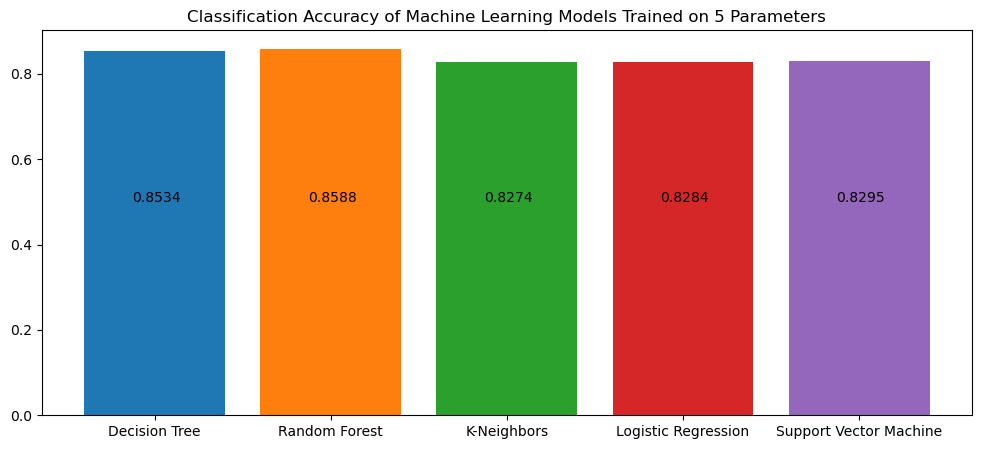

In [63]:
plt.figure(figsize = (12, 5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.bar(accuracies5.keys(), accuracies5.values(), color=colors)
plt.title("Classification Accuracy of Machine Learning Models Trained on 5 Parameters")

for index, key in enumerate(accuracies5):
    plt.text(index-0.13, .5, "{0:.4f}".format(accuracies5[key]))

#### Repeat all the same procedures for 10 correlated features. 

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)
accuracies10 = {}

# Decision Tree
best_depth = 1
best_accuracy = -1
for x in range(1, 50):
    model = DecisionTreeClassifier(max_depth = x)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    score = accuracy_score(prediction, y_test)
    
    if(score > best_accuracy):
        best_depth = x
        best_accuracy = score
        
accuracies10["Decision Tree"] = best_accuracy

# Random Forest
rmodel = RandomForestClassifier()
rmodel.fit(x_train, y_train)
rpredictions = rmodel.predict(x_test)
accuracies10["Random Forest"] = accuracy_score(rpredictions, y_test)

# K-Neighbors
best_k = 1
best_accuracy = -1
for x in range(1, 50):
    kmodel = KNeighborsClassifier(n_neighbors = x)
    kmodel.fit(x_train, y_train)
    prediction = kmodel.predict(x_test)
    score = accuracy_score(prediction, y_test)
    
    if(score > best_accuracy):
        best_k = x
        best_accuracy = score

accuracies10["K-Neighbors"] = best_accuracy

# Logistic Regression
lmodel = LogisticRegression(max_iter=1000)
lmodel.fit(x_train, y_train)
lpredictions = lmodel.predict(x_test)
accuracies10["Logistic Regression"] = accuracy_score(lpredictions, y_test)

# SVM
model = SVC(kernel="linear")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracies10["Support Vector Machine"] = accuracy_score(predictions, y_test)

### We improved our highest accuracy to 92% with 10 correlated features!

In [61]:
accuracies10

{'Decision Tree': 0.9098805646036916,
 'Random Forest': 0.9196525515743756,
 'K-Neighbors': 0.8013029315960912,
 'Logistic Regression': 0.8686210640608035,
 'Support Vector Machine': 0.8751357220412594}

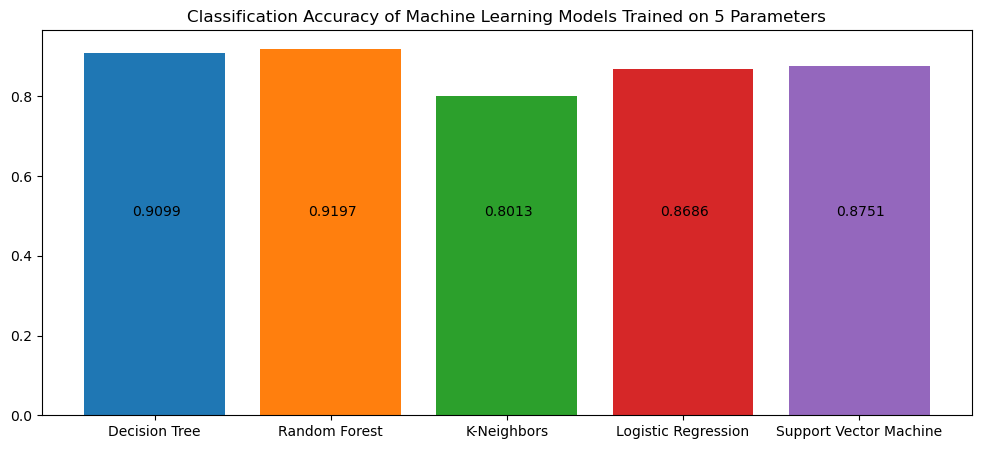

In [65]:
plt.figure(figsize = (12, 5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.bar(accuracies10.keys(), accuracies10.values(), color = colors)
plt.title("Classification Accuracy of Machine Learning Models Trained on 5 Parameters")

for index, key in enumerate(accuracies10):
    plt.text(index-0.13, .5, "{0:.4f}".format(accuracies10[key]))

## Confusion Matrix Visualization

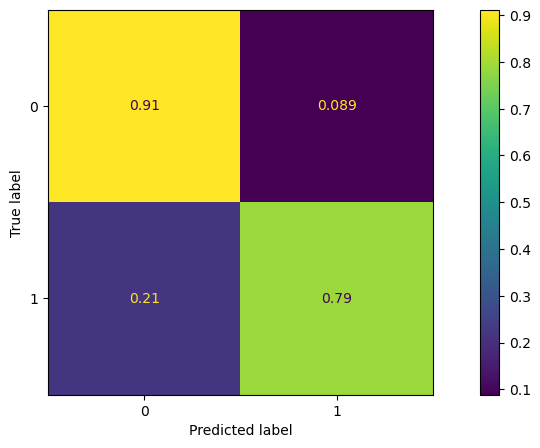

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rmodel, x_test, y_test, normalize='true')

Total Data Points: 921
KNeighbors True Negative Rate: 480
KNeighbors True Positive Rate: 265
KNeighbors False Negative Rate: 125
KNeighbors False Positive Rate: 51


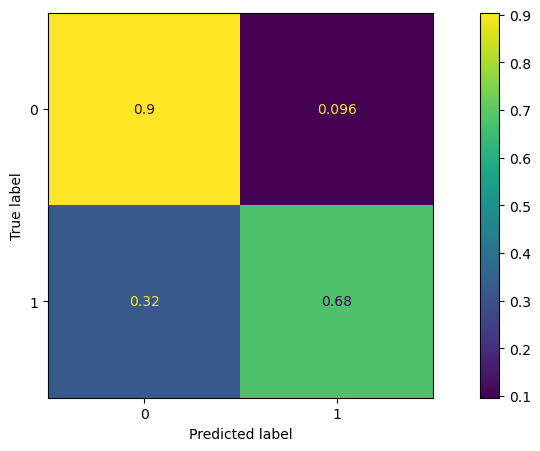

In [67]:
#KNeighbors Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, kmodel.predict(x_test)).ravel()

print("Total Data Points: " + str(tn + fp + fn + tp))
print("KNeighbors True Negative Rate: " + str(tn))
print("KNeighbors True Positive Rate: " + str(tp))
print("KNeighbors False Negative Rate: " + str(fn))
print("KNeighbors False Positive Rate: " + str(fp))

ConfusionMatrixDisplay.from_estimator(kmodel, x_test, y_test, normalize='true')

Total Data Points: 921
Logistic Regression True Negative Rate: 505
Logistic Regression True Positive Rate: 258
Logistic Regression False Negative Rate: 132
Logistic Regression False Positive Rate: 26


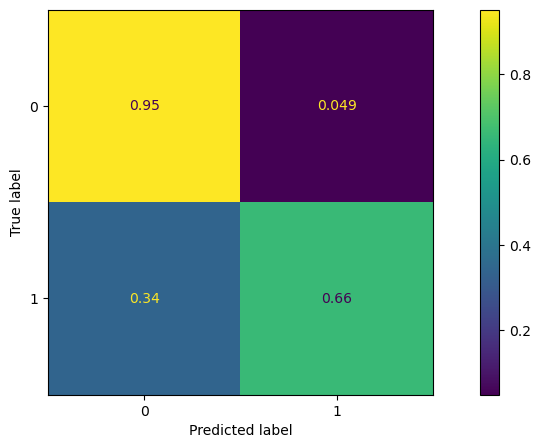

In [68]:
#Logistic Regression Confusion Matrix

tn, fp, fn, tp = confusion_matrix(y_test, lmodel.predict(x_test)).ravel()

print("Total Data Points: " + str(tn + fp + fn + tp))
print("Logistic Regression True Negative Rate: " + str(tn))
print("Logistic Regression True Positive Rate: " + str(tp))
print("Logistic Regression False Negative Rate: " + str(fn))
print("Logistic Regression False Positive Rate: " + str(fp))

ConfusionMatrixDisplay.from_estimator(lmodel, x_test, y_test, normalize='true')

## Observations from Confusion Matrix

We observe that our false positive rate (upper right square) is very low. This means that we classify non-spam emails as spam very infrequently. This is a good thing, because we don't want to classify normal emails as spam: if we are to make errors, we want them to be false negatives, in classifying spam emails as non-spam. 